In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.shape

(16598, 11)

In [4]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
# no of rows, range of index, total no of columns, names of all columns, datatype of all columns,no of non-null values(no of nulls)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# How to find null values
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Total null values in the entire dataset  -  271+58 = 329
data.isnull().sum().sum()

329

In [8]:
# Drop the null values
data = data.dropna()

In [9]:
data.shape

(16291, 11)

In [10]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
data["Publisher"].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Michaelsoft                        1
Aques                              1
989 Sports                         1
Altron                             1
Nippon Amuse                       1
Name: Publisher, Length: 576, dtype: int64

In [12]:
data["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
data["Platform"].nunique()

31

In [14]:
# which platform had the latest or earliest release and what were the sales of the game in various parts of the world
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [15]:
data['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [16]:
data['Year'].max()

2020.0

In [17]:
data['Year'].min()

1980.0

In [18]:
df1 = data[data['Year'] == 2020.0]
df1.shape

(1, 11)

In [19]:
df2 = data[data['Year'] == 1980.0]
df2.shape

(9, 11)

In [20]:
# Average global sales
df1.groupby(['Platform'])['Global_Sales'].mean()

Platform
DS    0.29
Name: Global_Sales, dtype: float64

In [21]:
# Average global sales
df2.groupby(['Platform'])['Global_Sales'].mean()

Platform
2600    1.264444
Name: Global_Sales, dtype: float64

In [22]:
# - which is start of year and end of year
# - filter data with earliest date and assign it to a var
# - filter the data with latest date and assign it to another var
# - from each find unique value
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [23]:
e = data.loc[data['Year'] == 1980]
l = data.loc[data['Year'] == 2020]

In [24]:
e

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4025,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
6317,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24


In [25]:
l

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [26]:
e['Platform'].unique()

array(['2600'], dtype=object)

In [27]:
l['Platform'].unique()

array(['DS'], dtype=object)

In [28]:
# Regions
x = ['NA', 'EU', 'JP', 'O']
x

['NA', 'EU', 'JP', 'O']

In [29]:
# Total Sales in each region
ye = [e['NA_Sales'].sum(), e['EU_Sales'].sum(), e['JP_Sales'].sum(), e['Other_Sales'].sum()]
ye

[10.590000000000002, 0.67, 0.0, 0.12000000000000001]

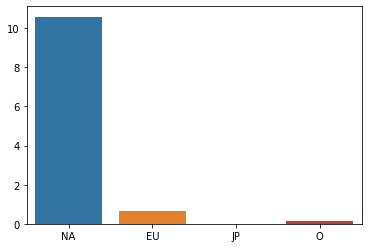

In [30]:
# let's plot graph to understand total sales better
sns.barplot(x=x, y=ye)

In [31]:
yl = [l['NA_Sales'].sum(), l['EU_Sales'].sum(), l['JP_Sales'].sum(), l['Other_Sales'].sum()]
yl

[0.27, 0.0, 0.0, 0.02]

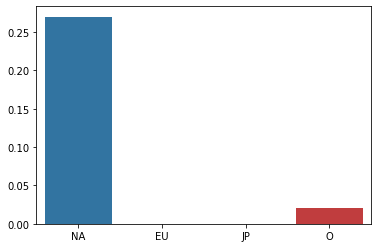

In [32]:
sns.barplot(x=x, y=yl)

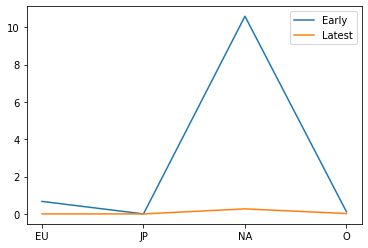

In [33]:
sns.lineplot(x=x, y=ye, label='Early')
sns.lineplot(x=x, y=yl, label='Latest')

In [36]:
# what was the most frequent platform and how did it perform during the years in global sales and individual sales
data['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [37]:
sample1 = data[data['Platform'] == 'DS']
sample1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
...,...,...,...,...,...,...,...,...,...,...,...
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01
16587,16590,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01


In [38]:
sample1.groupby(['Year'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].mean()

C:\Users\Joyita\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1985.0,0.000000,0.000000,0.020000,0.000000,0.020000
2004.0,0.366087,0.172609,0.158696,0.059565,0.759130
2005.0,0.410763,0.356441,0.253051,0.092458,1.113559
2006.0,0.250644,0.116485,0.190891,0.040990,0.599752
2007.0,0.202546,0.091724,0.071114,0.029894,0.396180
2008.0,0.161382,0.067175,0.048801,0.022683,0.300589
2009.0,0.154099,0.065481,0.059778,0.021556,0.301210
2010.0,0.129939,0.061564,0.060920,0.017577,0.269877
2011.0,0.099935,0.040392,0.028235,0.013203,0.181699


In [39]:
# Solution2
sample1['Year'].unique()

array([2006., 2005., 2010., 2009., 2004., 2007., 2012., 2008., 2011.,
       2013., 2020., 2014., 1985.])

In [40]:
na={1985:[],2006:[],2005:[],2010:[],2009:[],2004:[],2007:[],2012:[],2008:[],2011:[],2013:[],2020:[],2014:[]}
eu={1985:[],2006:[],2005:[],2010:[],2009:[],2004:[],2007:[],2012:[],2008:[],2011:[],2013:[],2020:[],2014:[]}
jp={1985:[],2006:[],2005:[],2010:[],2009:[],2004:[],2007:[],2012:[],2008:[],2011:[],2013:[],2020:[],2014:[]}
other={1985:[],2006:[],2005:[],2010:[],2009:[],2004:[],2007:[],2012:[],2008:[],2011:[],2013:[],2020:[],2014:[]}
g={1985:[],2006:[],2005:[],2010:[],2009:[],2004:[],2007:[],2012:[],2008:[],2011:[],2013:[],2020:[],2014:[]}

In [41]:
na

{1985: [],
 2006: [],
 2005: [],
 2010: [],
 2009: [],
 2004: [],
 2007: [],
 2012: [],
 2008: [],
 2011: [],
 2013: [],
 2020: [],
 2014: []}

In [42]:
for i in sample1.iterrows():
  year=i[1][3]
  na[year].insert(0,i[1][6])
  eu[year].insert(0,i[1][7])
  jp[year].insert(0,i[1][8])
  other[year].insert(0,i[1][9])
  g[year].insert(0,i[1][10])

In [43]:
na

{1985: [0.0],
 2006: [0.0,
  0.01,
  0.01,
  0.0,
  0.0,
  0.0,
  0.01,
  0.01,
  0.0,
  0.0,
  0.02,
  0.0,
  0.02,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.02,
  0.0,
  0.02,
  0.02,
  0.01,
  0.0,
  0.01,
  0.02,
  0.03,
  0.0,
  0.03,
  0.03,
  0.03,
  0.0,
  0.03,
  0.0,
  0.03,
  0.0,
  0.03,
  0.03,
  0.0,
  0.04,
  0.0,
  0.0,
  0.0,
  0.04,
  0.04,
  0.04,
  0.0,
  0.04,
  0.04,
  0.0,
  0.04,
  0.05,
  0.0,
  0.0,
  0.05,
  0.0,
  0.05,
  0.05,
  0.03,
  0.0,
  0.05,
  0.05,
  0.05,
  0.05,
  0.0,
  0.05,
  0.0,
  0.03,
  0.05,
  0.06,
  0.06,
  0.0,
  0.0,
  0.06,
  0.0,
  0.0,
  0.0,
  0.07,
  0.04,
  0.07,
  0.0,
  0.05,
  0.08,
  0.0,
  0.04,
  0.0,
  0.08,
  0.07,
  0.08,
  0.09,
  0.06,
  0.08,
  0.0,
  0.09,
  0.0,
  0.09,
  0.1,
  0.07,
  0.1,
  0.0,
  0.1,
  0.1,
  0.09,
  0.0,
  0.0,
  0.0,
  0.12,
  0.0,
  0.12,
  0.12,
  0.08,
  0.13,
  0.0,
  0.09,
  0.02,
  0.0,
  0.13,
  0.14,
  0.0,
  0.13,
  0.15,
  0.0,
  0.02,
  0.12,
  0.13,
  0.0,
  0.0,
  0.17,
  0.16,
  0

In [44]:
for i in sample1.iterrows():
  print(i[1][6])

11.38
9.07
9.81
4.75
6.42
5.57
3.44
2.55
4.4
5.08
4.46
2.91
2.82
1.67
0.66
3.13
1.22
1.9
1.64
1.85
2.89
0.92
0.87
2.26
1.59
0.0
1.61
1.22
0.59
2.11
1.43
0.65
0.0
0.58
1.88
1.79
1.22
0.91
1.57
1.3
1.32
1.47
0.3
1.63
1.59
0.63
0.28
1.07
0.52
0.95
1.42
1.71
1.06
1.29
0.64
0.93
0.91
0.92
1.23
1.16
1.11
0.49
0.99
0.79
1.34
0.22
0.23
0.83
0.7
1.15
0.0
0.49
0.69
0.32
0.99
1.5
0.4
0.19
0.85
0.81
0.64
1.06
0.58
1.07
0.86
0.57
1.08
1.0
0.43
0.39
0.69
1.15
0.46
0.11
0.37
0.79
0.0
0.34
1.27
0.8
0.74
1.18
0.59
0.77
0.71
0.51
0.72
0.81
0.76
0.55
0.56
0.1
0.54
0.5
1.12
1.1
0.66
0.74
0.95
0.54
0.66
0.5
0.47
0.63
0.96
0.44
0.55
0.67
0.65
0.72
0.23
0.96
0.97
0.32
0.45
0.58
0.58
0.57
0.52
0.68
0.51
0.0
0.86
0.17
0.49
0.59
0.85
0.56
0.09
0.82
0.72
0.37
0.3
0.39
0.65
0.85
0.0
0.57
0.3
0.51
0.84
0.51
0.0
0.59
0.63
0.54
0.61
0.1
0.28
0.56
0.46
0.38
0.77
0.4
0.73
0.73
0.42
0.62
0.71
0.22
0.58
0.41
0.72
0.29
0.61
0.43
0.21
0.7
0.27
0.67
0.42
0.29
0.0
0.44
0.63
0.37
0.0
0.67
0.34
0.35
0.13
0.32
0.54
0.39
0.38
0

In [45]:
# Sum of sales in each year
for i in na.keys():
  na[i]=sum(na[i])
for i in eu.keys():
  eu[i]=sum(eu[i])
for i in jp.keys():
  jp[i]=sum(jp[i])
for i in other.keys():
  other[i]=sum(other[i])
for i in g.keys():
  g[i]=sum(g[i])

In [53]:
!pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


TypeError: plot got an unexpected keyword argument 'x'

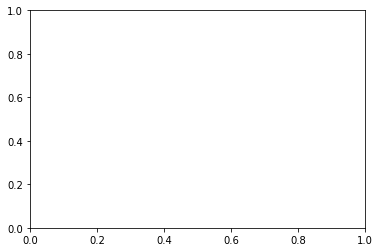

In [57]:
sns.lineplot(data=na,label='na')
sns.lineplot(data=eu,label='eu')
sns.lineplot(data=jp,label='jp')
sns.lineplot(data=other,label='other')
#sns.lineplot(data=g,label='global')

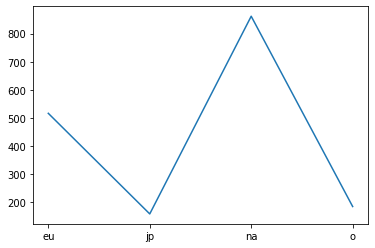

In [52]:
# action gener which it had the most sales
na=data[data['Genre']=='Action']['NA_Sales'].sum()
eu=data[data['Genre']=='Action']['EU_Sales'].sum()
jp=data[data['Genre']=='Action']['JP_Sales'].sum()
o=data[data['Genre']=='Action']['Other_Sales'].sum()
#g=data[data['Genre']=='Action']['Global_Sales'].max()

x= ['na','eu','jp','o']

y = [na,eu,jp,o]

sns.lineplot(x=x,y=y)
